#**Importing** **the** **data** **set**

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving data.csv to data.csv


1. For a given dataset, display a chosen feature using different mean values
2. Display the confidence interval of a chosen feature based on a sample

#**Header** **files**

In [ ]:
import numpy as np
from numpy import average
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
import csv



#**Read** **datasets** (Spotify Recommandation)

In [ ]:
data = pd.read_csv("data.csv")
print(data)

     danceability  energy  key  ...  duration_ms  time_signature  liked
0           0.803  0.6240    7  ...       304524               4      0
1           0.762  0.7030   10  ...       247178               4      1
2           0.261  0.0149    1  ...       286987               4      0
3           0.722  0.7360    3  ...       208920               4      1
4           0.787  0.5720    1  ...       179413               4      1
..            ...     ...  ...  ...          ...             ...    ...
190         0.166  0.0551    9  ...       206520               3      0
191         0.862  0.6240    3  ...       254240               4      0
192         0.499  0.3510    9  ...       235947               4      0
193         0.574  0.7290   10  ...       190239               5      1
194         0.747  0.6660   11  ...       177213               4      1

[195 rows x 14 columns]


In [ ]:
for row in data:
  print(row)


danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
duration_ms
time_signature
liked


#Data Features


*   acousticness : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* danceability : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* duration_ms : The duration of the track in milliseconds.
* energy : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* instrumentalness : Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* key : The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* liveness : Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* loudness : The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* mode : Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness : Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* tempo : The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* time_signature : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).



#**Preffered** **feature** -> ***Energy with Time_signature***

In [ ]:
x=data.energy
y=data.time_signature

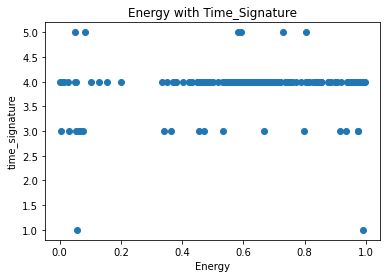

In [ ]:
plt.title("Energy with Time_Signature")
plt.xlabel("Energy")
plt.ylabel("time_signature")

plt.scatter(x, y)
plt.show()

n=len(y)


In [ ]:
data.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


In [ ]:
#mean value 

mean=st.mean(x) #average energy level of any music

print("Average energy level",mean)
print("Rounding the Average to 2 decimals",round(mean,2))

Average energy level 0.6384314871794872
Rounding the Average to 2 decimals 0.64


In [ ]:
#trimmed mean

m = stats.trim_mean(x, 0.1) #Trim 10% at both ends
print("Average value by 80% of the given data=",m)

m = stats.trim_mean(x, 0.2) #Trim 20% at both ends
print("Average value by 60% of the given data=",m)

m = stats.trim_mean(x, 0.3) #Trim 10% at both ends
print("Average value by 40% of the given data=",m)
m = stats.trim_mean(x, 0.4) #Trim 10% at both ends
print("Average value by 20% of the given data=",m)

Average value by 80% of the given data= 0.667356687898089
Average value by 60% of the given data= 0.6673760683760683
Average value by 40% of the given data= 0.6637215189873418
Average value by 20% of the given data= 0.6598717948717947


In [ ]:
#Weighted mean
#taking time duration as distribution
#taking energy as wights
def weighted_average_m1(y, x):
    return round(sum([y[i]*x[i] for i in range(n)])/sum(x),2)

print("Weighted mean of time_duration with energ=",weighted_average_m1(y, x))


Weighted mean of time_duration with energ= 3.94


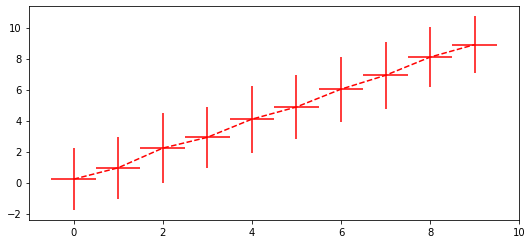

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame()
df['energy'] = np.random.choice(np.arange(10), 1000, replace=True)
df['time_duration'] = np.random.normal(df['energy'], 1)

mean = df.groupby('energy')['time_duration'].mean()
std = df.groupby('energy')['time_duration'].std()
plt.errorbar(mean.index, mean, xerr=0.5, yerr=2*std,
               linestyle='--', c='red')

plt.show()